In [31]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [32]:
train = pd.read_csv('blogs.csv')

In [33]:
train.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [34]:
test = pd.read_csv('blogs.csv')

In [35]:
test.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [37]:
train.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [39]:
test.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [40]:
test['Data'].value_counts()

Data
Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,\n#|> #has few religously motivated murders, and few murders of *any*\n#|> #kind, says very little about whether inter-religion murders elsewhere\n#|> #are religiously motivated.\n#|> \n#|> No, but it allows one to conclude that there is nothing inherent\n#|> in all religion (or for that matter, in catholicism and protestantism)\n#|> that motivates one to kill.\n#\n#"Motivates" or "allows?"    The Christian Bible says that one may kill\n#under certain circumstances.   In fact, it instructs one to kill under\n#certain circumstances.     \n\nI'd say the majority of people have a moral system that instructs them\nto kill under certain circumstances.  I do get your distinction between\nmotivate and allow, and I do agree that if a flavour of theism 'allows'\natoricities, then that's an indictment of that theism.  But it rather\ndepends on what the 'certain circumstances' are.  When you talk about\nChristianity, or Islam, then at least your claims can be understood.\nIt's when people go to a general statement about theism that it falls\napart.  One could believe in a God which instructs one to be utterly\nharmless.\n#\n#|> For my part, I conclude that something\n#|> else is required.  I also happen to believe that that something\n#|> else will work no less well without religion - any easy Them/Us will\n#|> do.\n#\n#And what does religion supply, if not an easy Them/Us?\n\nNot necessarily.  "Love thy neighbour" does not supply a them/us - it\ndemolishes it.  And my definition of religion is broader than my\ndefinition of theism, as I have explained.\n#\n#|> #By insisting that even the murder of four labourers, chosen because\n#|> #they were catholics, and who had nothing to do with the IRA, by \n#|> #Protestant extremists, is *not* religously motivated, I think what \n#|> #you are saying is that you simply will not accept *any* murder as \n#|> #being religiously motivated.\n#|> \n#|> No.  What about that guy who cut off someone's head because he believed \n#|> he was the devil incarnate?  That was religously motivated.\n#\n#What about the Protestant extremists who killed four Catholic \n#labourers?     That *wasn't* religiously motivated?\n\nNot in my opinion.  If they were doing it because of some obscure\npoint of theology, then yes.  But since all protestants don't do this\n(nor do they elect extremists to do it for them), it's just too broad\ntoo say "religion did this".  I'm saying that the causes are far more\ncomplex than that - take away the religious element, and you'd still\nhave the powerful motives of revenge and misguided patriotism.  You\nknow, when most Catholics and Protestants worldwide say 'stop the \nkilling', one might listen to that, especially when you claim not\nto read minds.\n#\n#\n#|> Also, the murders ensuing from the fatwa on Mr. Rushdie, the Inquisitions,\n#|> and the many religous wars.\n#\n#What's so special about these exceptions?    Isn't this all just a\n#grab-bag of ad-hoc excuses for not considering some other murde

In [41]:
train[train.duplicated()].shape

(0, 2)

In [42]:
train[train.duplicated()].head()

,Data,Labels


In [43]:
Train =train.drop_duplicates()

In [44]:
Train.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [45]:
Train.isnull().sum().sum()

0

In [46]:
test[test.duplicated()].shape

(0, 2)

In [47]:
test[test.duplicated()].head()

,Data,Labels


In [48]:
Test=test.drop_duplicates()

In [49]:
Test.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [50]:
Test.isnull().sum().sum()

0

In [51]:
Train['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [52]:
Test['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [53]:
pd.crosstab(Train['Data'],Train['Labels'])

Labels                                              alt.atheism  \
Data                                                              
From: bressler@iftccu.ca.boeing.com (Rick Bress...            0   
From: bressler@iftccu.ca.boeing.com (Rick Bress...            0   
From: chrisa@hpwarr.hp.com ( Chris Almy)\nDate:...            0   
From: david@trsvax.tandy.com\nDate: 23 Apr 93 1...            0   
From: lynch@hpcc01.corp.hp.com (Howard Lynch)\n...            0   
...                                                         ...   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...            0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...            0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...            0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...            0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...            0   

Labels                                              comp.graphics  \
Data                                                                
From: bressler@iftccu.ca.boeing.com (Rick Bress...              0   
From: bressler@iftccu.ca.boeing.com (Rick Bress...              0   
From: chrisa@hpwarr.hp.com ( Chris Almy)\nDate:...              0   
From: david@trsvax.tandy.com\nDate: 23 Apr 93 1...              0   
From: lynch@hpcc01.corp.hp.com (Howard Lynch)\n...              0   
...                                                           ...   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...              0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...              0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...              0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...              0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...              0   

Labels                                              comp.os.ms-windows.misc  \
Data                                                                          
From: bressler@iftccu.ca.boeing.com (Rick Bress...                        0   
From: bressler@iftccu.ca.boeing.com (Rick Bress...                        0   
From: chrisa@hpwarr.hp.com ( Chris Almy)\nDate:...                        1   
From: david@trsvax.tandy.com\nDate: 23 Apr 93 1...                        0   
From: lynch@hpcc01.corp.hp.com (Howard Lynch)\n...                        0   
...                                                                     ...   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                        0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                        0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                        0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                        0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                        0   

Labels                                              comp.sys.ibm.pc.hardware  \
Data                                                                           
From: bressler@iftccu.ca.boeing.com (Rick Bress...                         0   
From: bressler@iftccu.ca.boeing.com (Rick Bress...                         0   
From: chrisa@hpwarr.hp.com ( Chris Almy)\nDate:...                         0   
From: david@trsvax.tandy.com\nDate: 23 Apr 93 1...                         0   
From: lynch@hpcc01.corp.hp.com (Howard Lynch)\n...                         0   
...                                                                      ...   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                         0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                         0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                         0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                         0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                         0   

Labels                                              comp.sys.mac.hardware  \
Data                                                                        
From: b

In [54]:
pd.crosstab(Train['Data'],Train['Labels'])

Labels                                              alt.atheism  \
Data                                                              
From: bressler@iftccu.ca.boeing.com (Rick Bress...            0   
From: bressler@iftccu.ca.boeing.com (Rick Bress...            0   
From: chrisa@hpwarr.hp.com ( Chris Almy)\nDate:...            0   
From: david@trsvax.tandy.com\nDate: 23 Apr 93 1...            0   
From: lynch@hpcc01.corp.hp.com (Howard Lynch)\n...            0   
...                                                         ...   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...            0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...            0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...            0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...            0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...            0   

Labels                                              comp.graphics  \
Data                                                                
From: bressler@iftccu.ca.boeing.com (Rick Bress...              0   
From: bressler@iftccu.ca.boeing.com (Rick Bress...              0   
From: chrisa@hpwarr.hp.com ( Chris Almy)\nDate:...              0   
From: david@trsvax.tandy.com\nDate: 23 Apr 93 1...              0   
From: lynch@hpcc01.corp.hp.com (Howard Lynch)\n...              0   
...                                                           ...   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...              0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...              0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...              0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...              0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...              0   

Labels                                              comp.os.ms-windows.misc  \
Data                                                                          
From: bressler@iftccu.ca.boeing.com (Rick Bress...                        0   
From: bressler@iftccu.ca.boeing.com (Rick Bress...                        0   
From: chrisa@hpwarr.hp.com ( Chris Almy)\nDate:...                        1   
From: david@trsvax.tandy.com\nDate: 23 Apr 93 1...                        0   
From: lynch@hpcc01.corp.hp.com (Howard Lynch)\n...                        0   
...                                                                     ...   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                        0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                        0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                        0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                        0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                        0   

Labels                                              comp.sys.ibm.pc.hardware  \
Data                                                                           
From: bressler@iftccu.ca.boeing.com (Rick Bress...                         0   
From: bressler@iftccu.ca.boeing.com (Rick Bress...                         0   
From: chrisa@hpwarr.hp.com ( Chris Almy)\nDate:...                         0   
From: david@trsvax.tandy.com\nDate: 23 Apr 93 1...                         0   
From: lynch@hpcc01.corp.hp.com (Howard Lynch)\n...                         0   
...                                                                      ...   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                         0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                         0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                         0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                         0   
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.m...                         0   

Labels                                              comp.sys.mac.hardware  \
Data                                                                        
From: b

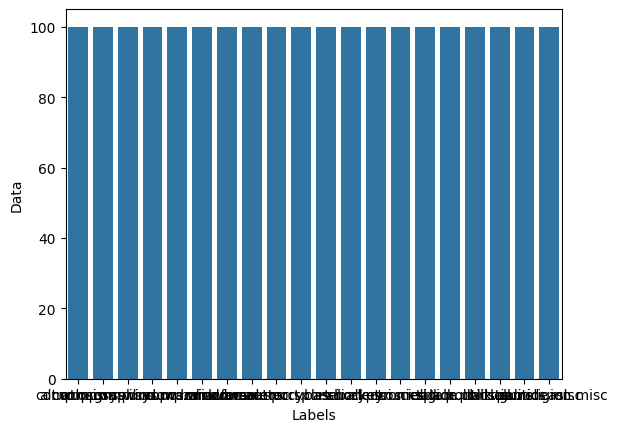

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [55]:
sns.countplot(x='Labels',data= Train)
plt.xlabel('Labels')
plt.ylabel('Data')
plt.show()
Train['Labels'].value_counts()

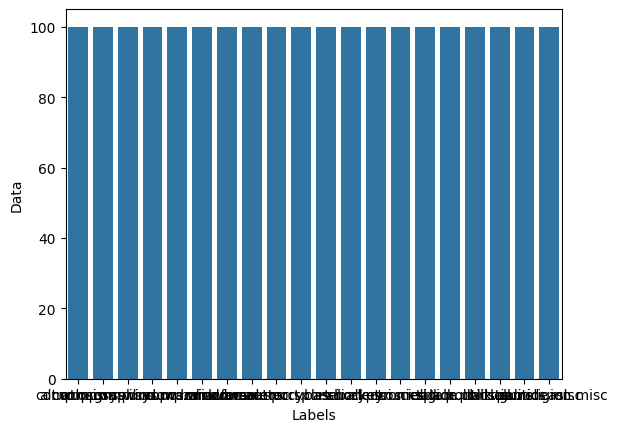

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [56]:
sns.countplot(x='Labels',data= Test)
plt.xlabel('Labels')
plt.ylabel('Data')
plt.show()
Test['Labels'].value_counts()

<Axes: >

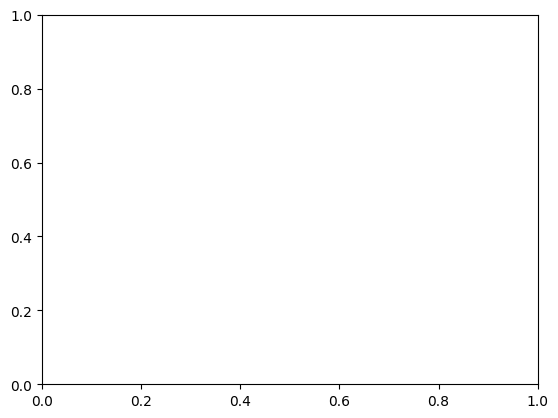

In [57]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

Train['Data'] = pd.to_numeric(Train['Data'], errors='coerce')

sns.scatterplot(x=Train.index, y=Train['Data'], hue=Train['Data'])

In [58]:
ct_mean = pd.crosstab(Train['Data'], Train['Labels']).mean()

if ct_mean.empty or ct_mean.size == 1:
    print("Crosstab mean is empty or has a single value. Cannot create a bar plot.")
else:

    ct_mean.plot(kind='bar')
    plt.title('Mean of Crosstab between Data and Labels')
    plt.xlabel('Labels')
    plt.ylabel('Mean Frequency')
    plt.show()

Crosstab mean is empty or has a single value. Cannot create a bar plot.


In [59]:
string_columns = ["Data,Labels"]

In [60]:
string_columns = ["Data", "Labels"]
number = LabelEncoder()
for i in string_columns:
    Train[i] = number.fit_transform(Train[i])
    Test[i] = number.fit_transform(Test[i])

In [61]:
colnames = Train.columns
colnames

Index(['Data', 'Labels'], dtype='object')

In [62]:
len(colnames)

2

In [63]:
Test.head()

,Data,Labels
0,1192,0
1,14,0
2,1088,0
3,1252,0
4,1447,0


In [64]:
x_train = Train[colnames[0:1]].values
y_train = Train[colnames[1]].values
x_test = Test[colnames[0:1]].values
y_test = Test[colnames[1]].values

In [65]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [66]:
x_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [67]:
x_test

array([[1192],
       [  14],
       [1088],
       ...,
       [1904],
       [1974],
       [1785]])

In [68]:
y_train

array([ 0,  0,  0, ..., 19, 19, 19])

In [69]:
y_test

array([ 0,  0,  0, ..., 19, 19, 19])

In [70]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

<ipython-input-65-9224037d81fe>:2: RuntimeWarning: invalid value encountered in divide
  x = (i-i.min())/(i.max()-i.min())


In [71]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.impute import SimpleImputer

# ... (your existing code) ...

# Assuming 'Data' and 'Labels' are the relevant columns
x_train = Train[['Data']].values  # Select the 'Data' column as a DataFrame
y_train = Train['Labels'].values
x_test = Test[['Data']].values    # Select the 'Data' column as a DataFrame
y_test = Test['Labels'].values

# Imputation to handle NaN values
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Model fitting and prediction
M_model = MB()
train_pred_multi = M_model.fit(x_train, y_train).predict(x_train)
test_pred_multi = M_model.fit(x_train, y_train).predict(x_test)

# ... (rest of your code) ...

In [72]:
train_acc_multi=np.mean(train_pred_multi==y_train)
train_acc_multi

0.05

In [73]:
test_acc_multi=np.mean(test_pred_multi==y_test)
test_acc_multi

0.05

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [75]:
confusion_matrix

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [76]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_multi))

0.05


In [77]:
from sklearn.naive_bayes import GaussianNB as GB
G_model=GB()
train_pred_gau=G_model.fit(x_train,y_train).predict(x_train)
test_pred_gau=G_model.fit(x_train,y_train).predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:514: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:514: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.11/dist-packages/sklea

In [78]:
train_acc_gau=np.mean(train_pred_gau==y_train)
train_acc_gau

0.05

In [79]:
test_acc_gau=np.mean(test_pred_gau==y_test)
test_acc_gau

0.05

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_gau)

In [81]:
confusion_matrix

array([[100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  

In [82]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,test_pred_gau))

0.05
